In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
df = pd.read_csv("books.csv", error_bad_lines= False)

C:\Users\Latte\AppData\Local\Temp\ipykernel_9788\1420892592.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("books.csv", error_bad_lines= False)


In [3]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 11127, Columns: 13


In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,image_url
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,https://i.gr-assets.com/images/S/compressed.ph...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,https://i.gr-assets.com/images/S/compressed.ph...
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic,https://i.gr-assets.com/images/S/compressed.ph...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,https://i.gr-assets.com/images/S/compressed.ph...
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,https://i.gr-assets.com/images/S/compressed.ph...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  image_url           11127 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [6]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [7]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
image_url             0
dtype: int64

In [8]:
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
image_url             object
dtype: object

<Figure size 1080x720 with 0 Axes>

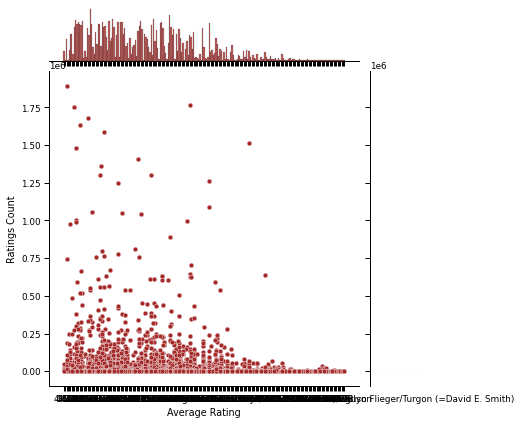

In [9]:
#avarage rating ve rating count arasindaki iliski
plt.figure(figsize=(15,10))
trial = df[~(df.ratings_count>2000000)]
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = trial, color = 'brown')
ax.set_axis_labels("Average Rating", "Ratings Count")
plt.show()

In [10]:
df2 = df.copy()

In [11]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [ ]:
language_df = pd.get_dummies(df2['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

array([[0.00000000e+00, 2.03047674e-02, 4.26182285e-02, 5.25332311e-02,
        5.30852567e-02, 9.59972118e-02],
       [0.00000000e+00, 2.03047674e-02, 2.65284290e-02, 3.36718047e-02,
        4.28951787e-02, 9.31968321e-02],
       [0.00000000e+00, 3.58877744e-04, 4.43050887e-04, 5.68331845e-04,
        7.23410530e-04, 7.45378198e-04],
       ...,
       [0.00000000e+00, 3.26252494e-06, 4.35003326e-06, 9.57007316e-06,
        1.13100865e-05, 1.37026048e-05],
       [0.00000000e+00, 1.30500998e-06, 3.48002660e-06, 6.09004656e-06,
        1.10925848e-05, 1.54426181e-05],
       [0.00000000e+00, 1.28325981e-05, 2.41426846e-05, 1.19625915e-04,
        2.00000030e-03, 2.00000626e-03]])

In [ ]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name[1:]

In [ ]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [ ]:
BookNames = BookRecommender('The Lord of the Rings: Weapons and Warfare')
BookNames

['Fullmetal Alchemist  Vol. 2 (Fullmetal Alchemist  #2)',
 "Carrie / 'Salem's Lot / The Shining",
 'The Valley of Vision: A Collection of Puritan Prayers and Devotions',
 'The Gettysburg Address',
 'The Return of the King (The Lord of the Rings  #3)']

In [ ]:
BookNames = BookRecommender("Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right")
BookNames

['The World Made Straight',
 'Devil May Care',
 'Into the Woods (De Beers  #4)',
 'Confessions of a Pagan Nun',
 'Three Guineas']

In [ ]:
import pickle

pickle.dump(idlist, open('idlist.pkl','wb'))
pickle.dump(df2, open('df2.pkl','wb'))


In [15]:
(df2.loc[df2["title"] == "Poor People"]).to_dict()

{'bookID': {11125: 45639},
 'title': {11125: 'Poor People'},
 'authors': {11125: 'William T. Vollmann'},
 'average_rating': {11125: '3.72'},
 'isbn': {11125: '60878827'},
 'isbn13': {11125: '9.78E+12'},
 'language_code': {11125: 'eng'},
 '  num_pages': {11125: '434'},
 'ratings_count': {11125: 769},
 'text_reviews_count': {11125: 139},
 'publication_date': {11125: '2/27/2007'},
 'publisher': {11125: 'Ecco'},
 'image_url': {11125: 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1388687283l/45639.jpg'}}

In [12]:
df2

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,image_url
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,https://i.gr-assets.com/images/S/compressed.ph...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,https://i.gr-assets.com/images/S/compressed.ph...
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic,https://i.gr-assets.com/images/S/compressed.ph...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,https://i.gr-assets.com/images/S/compressed.ph...
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78E+12,eng,512,156,20,12/21/2004,Da Capo Press,https://i.gr-assets.com/images/S/compressed.ph...
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78E+12,eng,635,783,56,12/1/1988,Penguin Books,https://i.gr-assets.com/images/S/compressed.ph...
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78E+12,eng,415,820,95,8/1/1993,Penguin Books,https://i.gr-assets.com/images/S/compressed.ph...
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78E+12,eng,434,769,139,2/27/2007,Ecco,https://i.gr-assets.com/images/S/compressed.ph...
